In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, recall_score,confusion_matrix, precision_score,f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("./datasets/train_data.csv")

In [4]:
data.shape

(318438, 18)

In [5]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [6]:
df = data.groupby(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code'])\
     .agg(extra_rooms=('Available Extra Rooms in Hospital',np.sum),mean_Deposit=('Admission_Deposit',np.mean),bed_grade=('Bed_Grade', data['']))

#df = pd.DataFrame(df.first()).reset_index()
df

KeyError: ''

In [7]:
data.info

<bound method DataFrame.info of         case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0             1              8                  c                   3   
1             2              2                  c                   5   
2             3             10                  e                   1   
3             4             26                  b                   2   
4             5             26                  b                   2   
...         ...            ...                ...                 ...   
318433   318434              6                  a                   6   
318434   318435             24                  a                   1   
318435   318436              7                  a                   4   
318436   318437             11                  b                   2   
318437   318438             19                  a                   7   

       Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0          

In [8]:
data.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [9]:
data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [10]:
data[data['City_Code_Patient'].isnull()]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
191,192,14,a,1,X,2,radiotherapy,Q,E,3.0,122110,NaN,Emergency,Minor,2,71-80,9096.0,51-60
192,193,30,c,3,Z,2,anesthesia,Q,A,4.0,122110,NaN,Trauma,Minor,2,71-80,5098.0,31-40
193,194,27,a,7,Y,2,radiotherapy,P,C,3.0,122110,NaN,Trauma,Minor,2,71-80,7776.0,21-30
194,195,27,a,7,Y,2,anesthesia,Q,C,3.0,122110,NaN,Trauma,Minor,2,71-80,5988.0,11-20
195,196,25,e,1,X,3,radiotherapy,S,E,3.0,122110,NaN,Urgent,Minor,2,71-80,5333.0,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318198,318199,23,a,6,X,2,anesthesia,Q,F,3.0,58469,NaN,Urgent,Minor,2,11-20,4432.0,11-20
318263,318264,28,b,11,X,3,anesthesia,R,F,3.0,66803,NaN,Trauma,Moderate,2,31-40,5415.0,11-20
318269,318270,26,b,2,Y,3,gynecology,R,D,4.0,95483,NaN,Trauma,Minor,5,51-60,4135.0,51-60
318271,318272,28,b,11,X,2,gynecology,R,F,4.0,117128,NaN,Emergency,Minor,2,61-70,3418.0,0-10


In [11]:
data.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

In [12]:
data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [13]:
modData = data.drop(['case_id','patientid'], axis=1)

In [14]:
modData.nunique()

Hospital_code                          32
Hospital_type_code                      7
City_Code_Hospital                     11
Hospital_region_code                    3
Available Extra Rooms in Hospital      18
Department                              5
Ward_Type                               6
Ward_Facility_Code                      6
Bed Grade                               4
City_Code_Patient                      37
Type of Admission                       3
Severity of Illness                     3
Visitors with Patient                  28
Age                                    10
Admission_Deposit                    7300
Stay                                   11
dtype: int64

In [15]:
modData.dtypes

Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [16]:
modData.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [17]:
#!pip install fancyimpute

In [18]:
def calc_null_percentages(df):
    p = df.isnull().sum().to_frame('Nulls Count')
    p['Nulls Percentage'] = p.apply(lambda x: round(x/sum(x)*100,2)) 
    return p

In [19]:
calc_null_percentages(modData)

,Nulls Count,Nulls Percentage
Hospital_code,0,0.00
Hospital_type_code,0,0.00
City_Code_Hospital,0,0.00
Hospital_region_code,0,0.00
Available Extra Rooms in Hospital,0,0.00
Department,0,0.00
Ward_Type,0,0.00
Ward_Facility_Code,0,0.00
Bed Grade,113,2.43
City_Code_Patient,4532,97.57


In [20]:
cat_cols = [col for col in modData.columns if col != 'Admission_Deposit']
cat_cols

['Hospital_code',
 'Hospital_type_code',
 'City_Code_Hospital',
 'Hospital_region_code',
 'Available Extra Rooms in Hospital',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Bed Grade',
 'City_Code_Patient',
 'Type of Admission',
 'Severity of Illness',
 'Visitors with Patient',
 'Age',
 'Stay']

In [21]:
nom_cat_cols = ['Hospital_code','Hospital_type_code','City_Code_Hospital','Hospital_region_code','Department',
               'Ward_Type','Ward_Facility_Code','City_Code_Patient','Type of Admission','Age']
modData[nom_cat_cols] = modData[nom_cat_cols].astype('category')


In [22]:
modData.dtypes

Hospital_code                        category
Hospital_type_code                   category
City_Code_Hospital                   category
Hospital_region_code                 category
Available Extra Rooms in Hospital       int64
Department                           category
Ward_Type                            category
Ward_Facility_Code                   category
Bed Grade                             float64
City_Code_Patient                    category
Type of Admission                    category
Severity of Illness                    object
Visitors with Patient                   int64
Age                                  category
Admission_Deposit                     float64
Stay                                   object
dtype: object

In [23]:
modData['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

In [24]:
modData['Bed Grade'] = pd.Categorical(modData['Bed Grade'], 
                                categories = [1.0, 2.0, 3.0, 4.0], 
                                ordered=True)

In [25]:
modData.dtypes

Hospital_code                        category
Hospital_type_code                   category
City_Code_Hospital                   category
Hospital_region_code                 category
Available Extra Rooms in Hospital       int64
Department                           category
Ward_Type                            category
Ward_Facility_Code                   category
Bed Grade                            category
City_Code_Patient                    category
Type of Admission                    category
Severity of Illness                    object
Visitors with Patient                   int64
Age                                  category
Admission_Deposit                     float64
Stay                                   object
dtype: object

In [26]:
extra_rooms = modData['Available Extra Rooms in Hospital'].value_counts()
extra_room_cat = extra_rooms.index.sort_values(ascending=True)
list(extra_room_cat)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 20, 21, 24]

In [27]:
modData['Available Extra Rooms in Hospital'] = pd.Categorical(modData['Available Extra Rooms in Hospital'], 
                                categories = list(extra_room_cat), 
                                ordered=True)

In [28]:
modData.dtypes

Hospital_code                        category
Hospital_type_code                   category
City_Code_Hospital                   category
Hospital_region_code                 category
Available Extra Rooms in Hospital    category
Department                           category
Ward_Type                            category
Ward_Facility_Code                   category
Bed Grade                            category
City_Code_Patient                    category
Type of Admission                    category
Severity of Illness                    object
Visitors with Patient                   int64
Age                                  category
Admission_Deposit                     float64
Stay                                   object
dtype: object

In [29]:
vwp  = modData['Visitors with Patient'].value_counts()
vwp_cat = list(vwp.index.sort_values(ascending=True))
#list(extra_room_cat)
vwp_cat

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 30,
 32]

In [30]:
modData['Visitors with Patient'] = pd.Categorical(modData['Visitors with Patient'], 
                                categories = vwp_cat, 
                                ordered=True)

In [31]:
modData['Severity of Illness'].value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64

In [32]:
modData['Severity of Illness'] = pd.Categorical(modData['Severity of Illness'], 
                                categories = ['Minor', 'Moderate', 'Extreme'], 
                                ordered=True)

In [33]:
cat_ord_cols = ['Bed Grade','Available Extra Rooms in Hospital','Visitors with Patient', 'Severity of Illness']

<Figure size 864x1008 with 0 Axes>

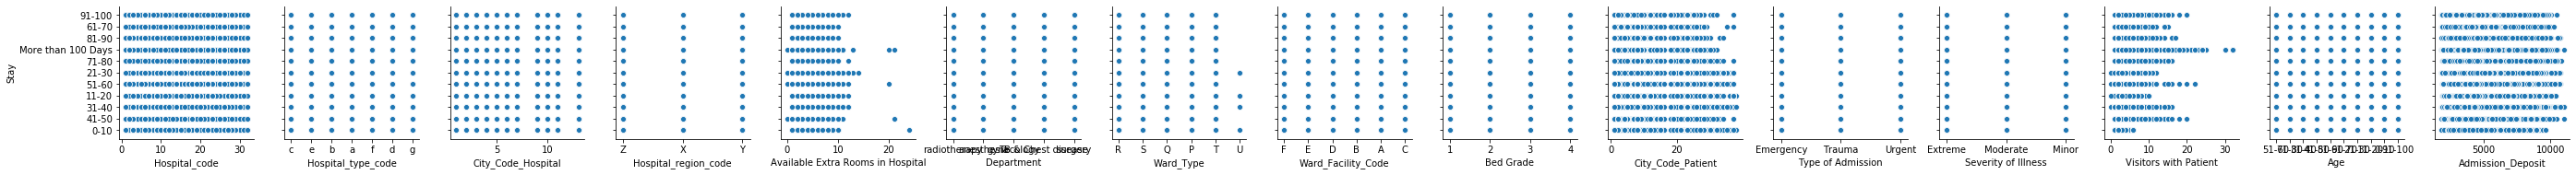

In [31]:
plt.figure(figsize=(12,14))
sns.pairplot(modData, 
             y_vars="Stay", 
             x_vars=modData.drop('Stay', axis=1).columns.values)

In [34]:
cat_cols = modData.select_dtypes(include=['object','category']).columns.tolist()
cat_cols.remove('Stay')
cat_cols.remove(cat_ord_cols)

ValueError: list.remove(x): x not in list

In [36]:
len(cat_cols)

14

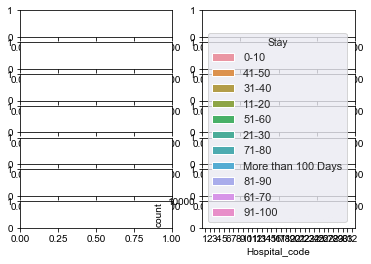

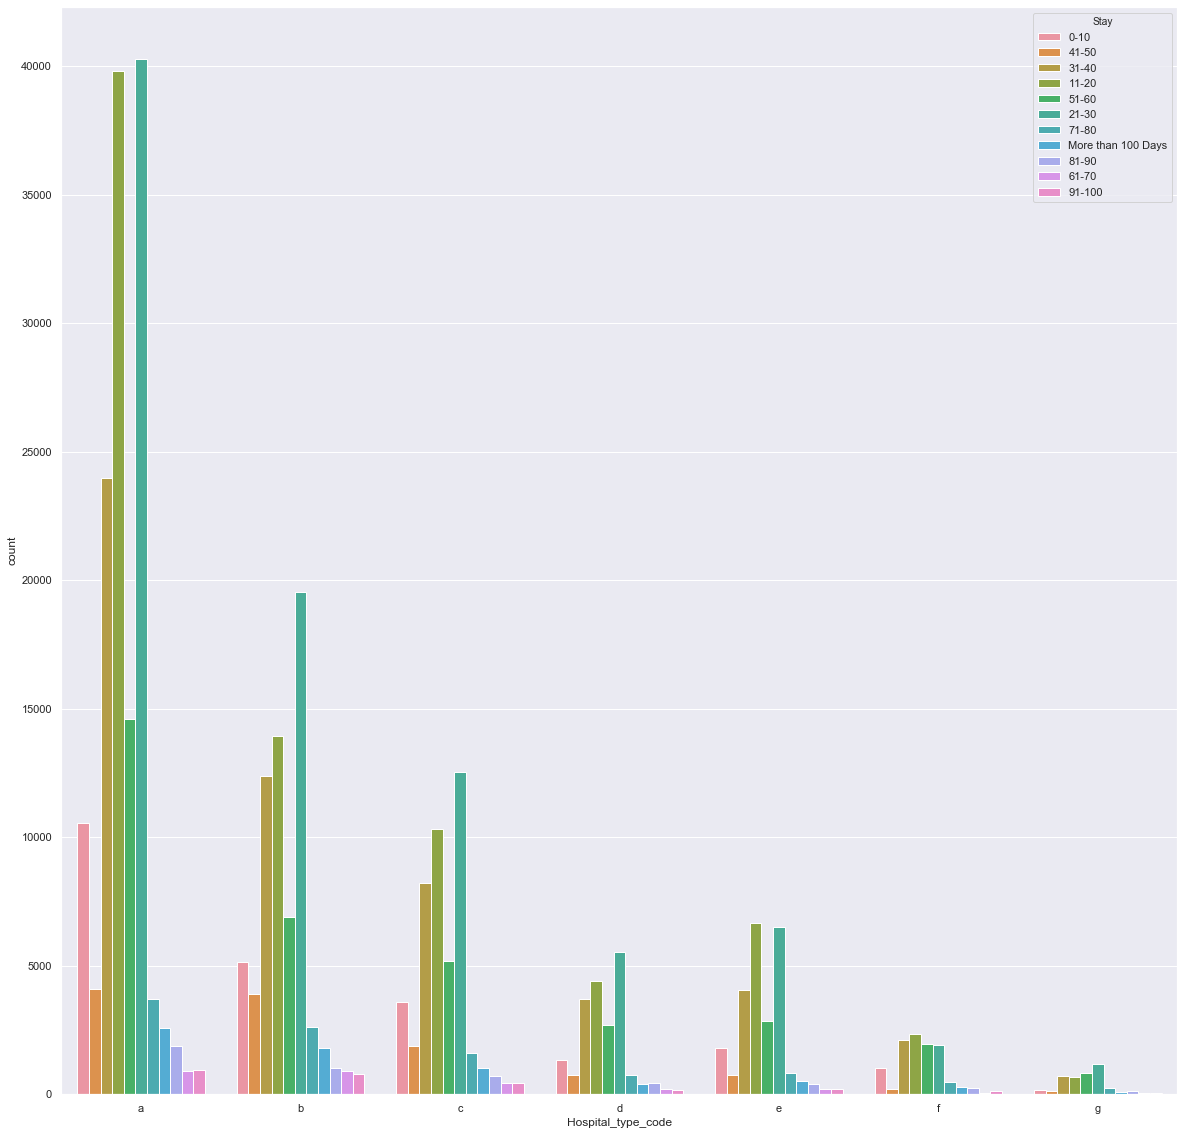

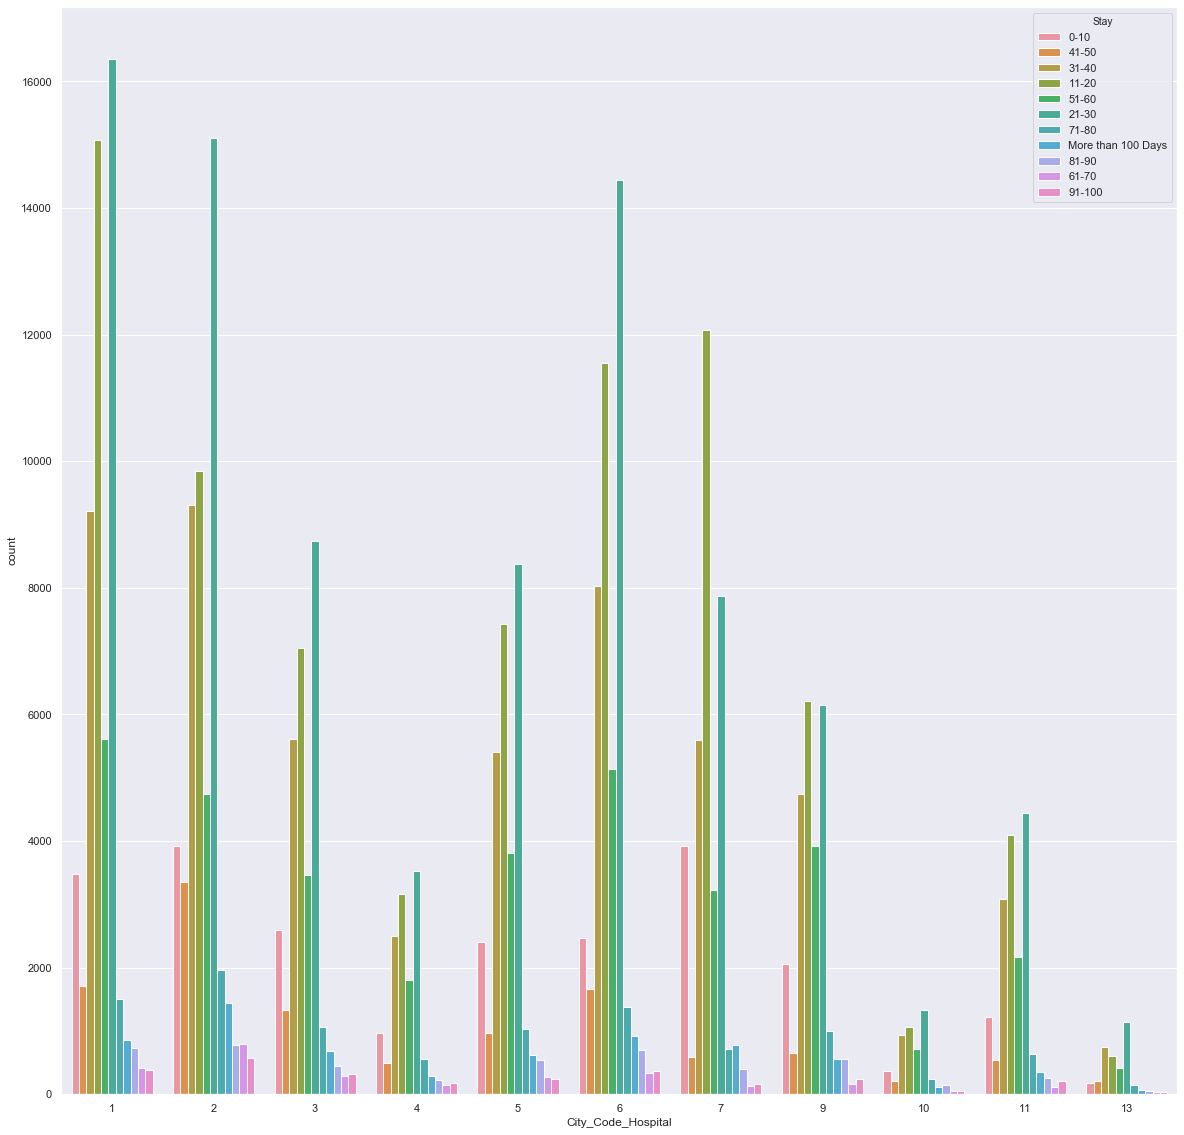

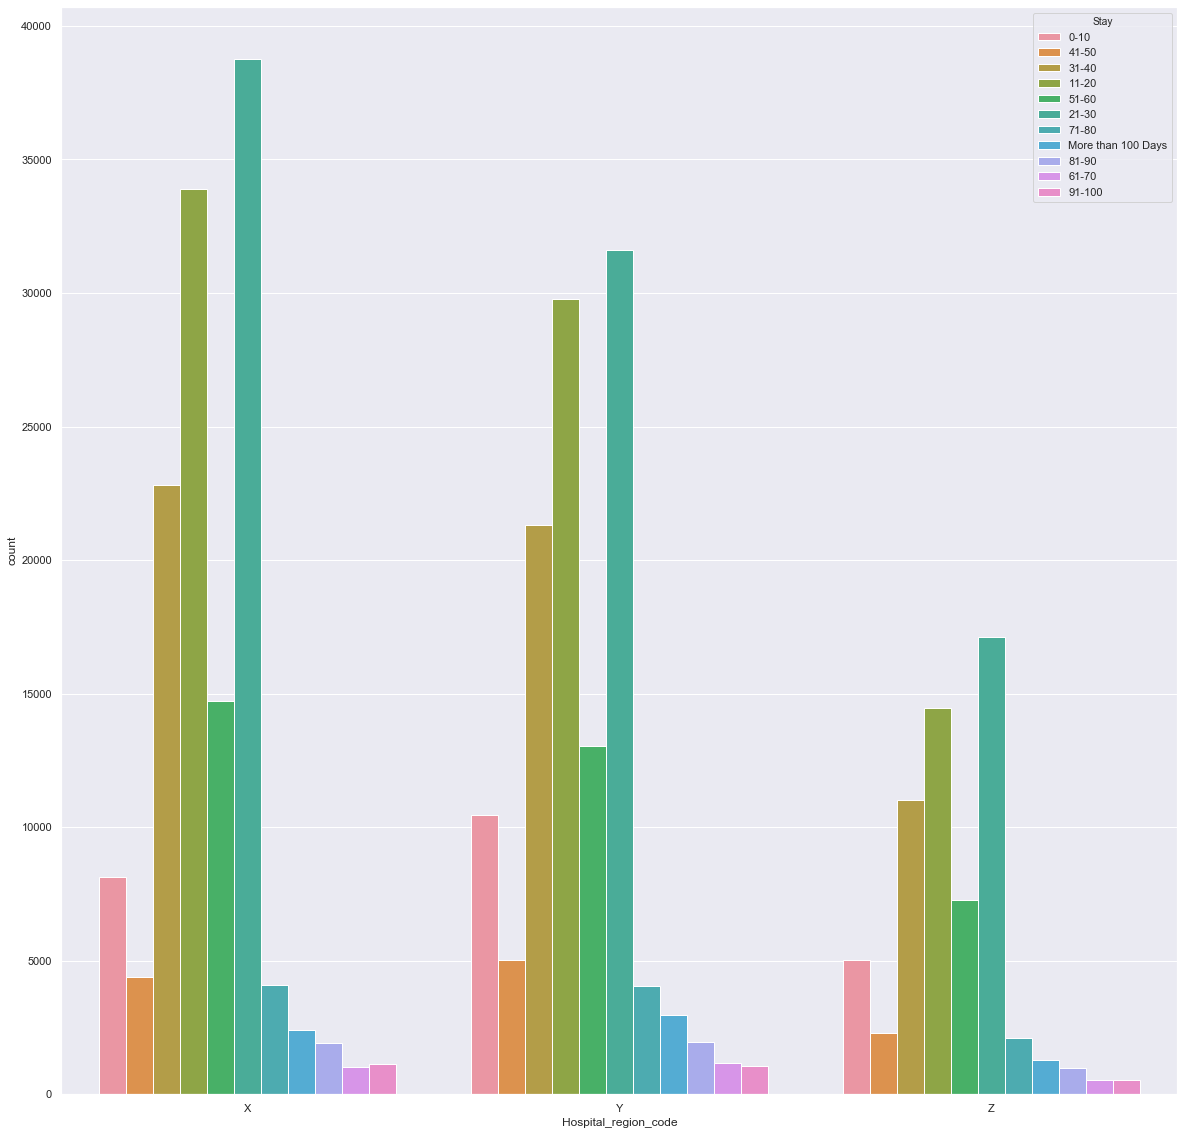

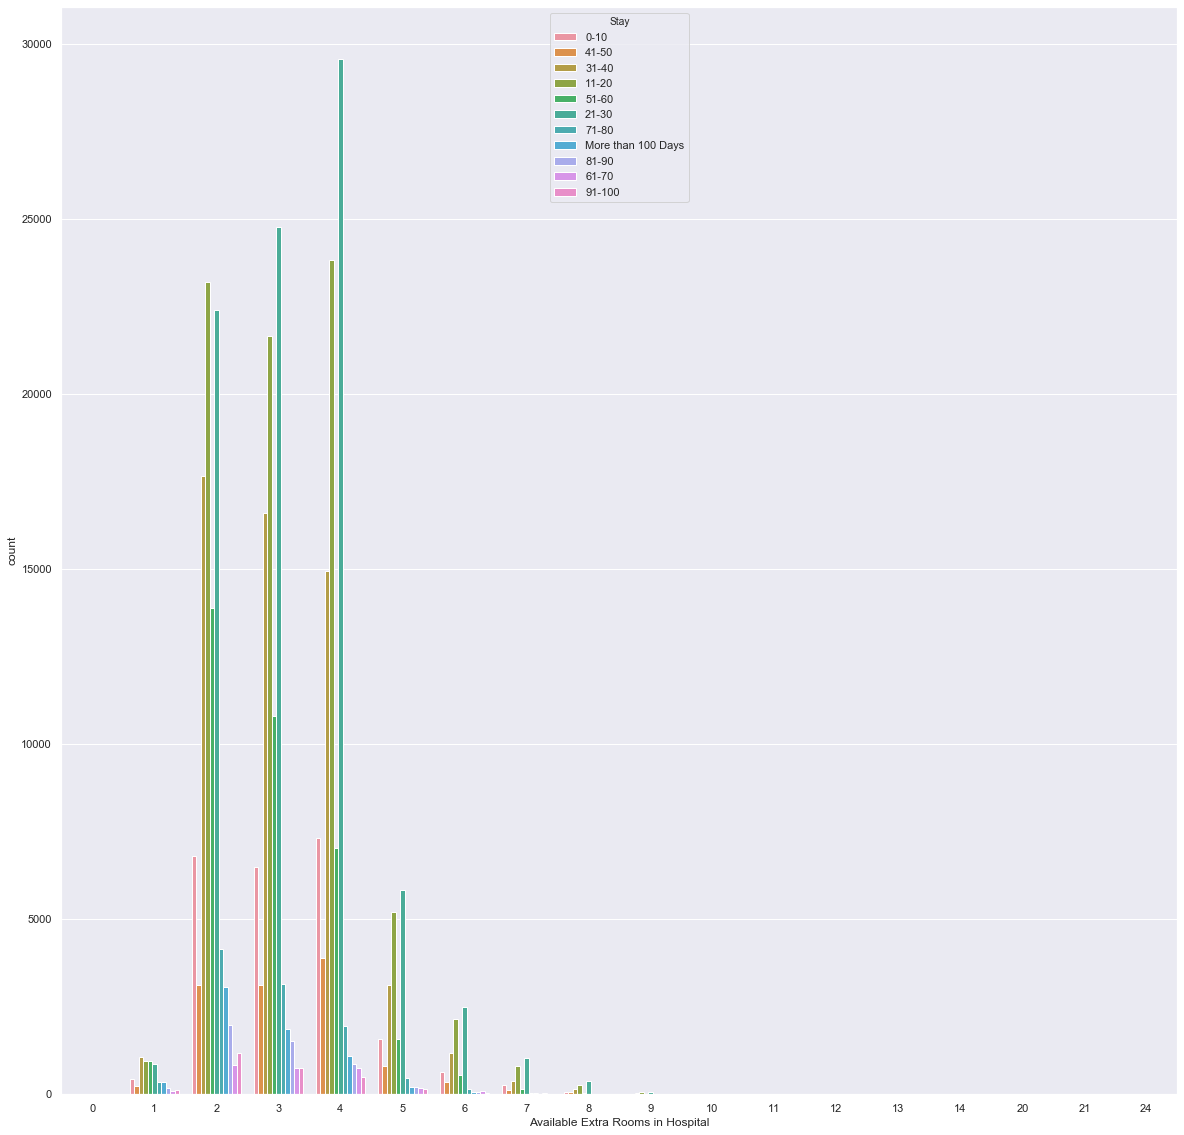

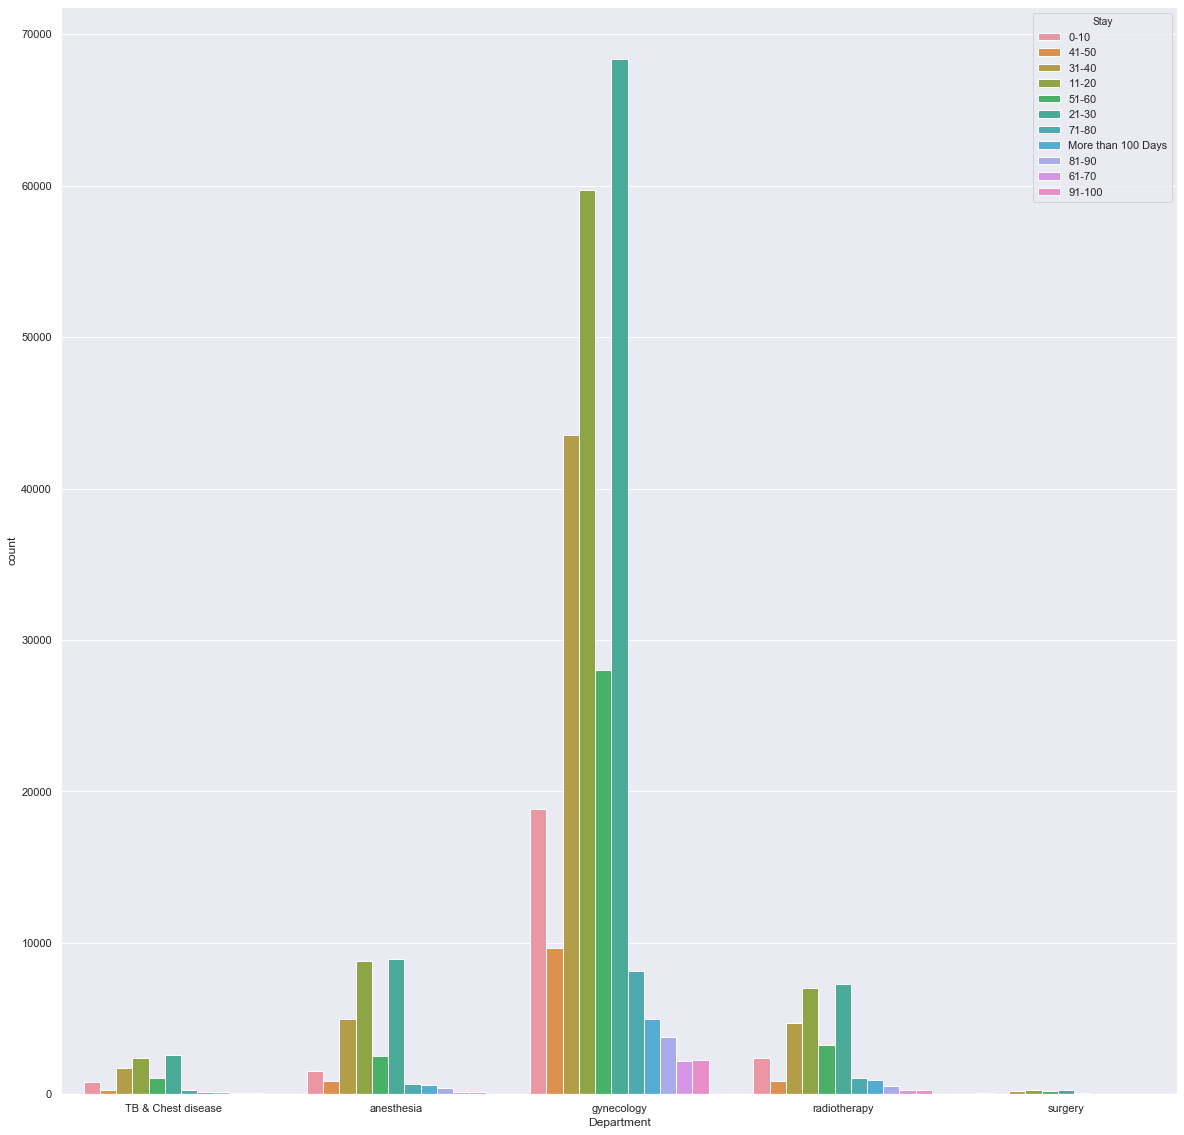

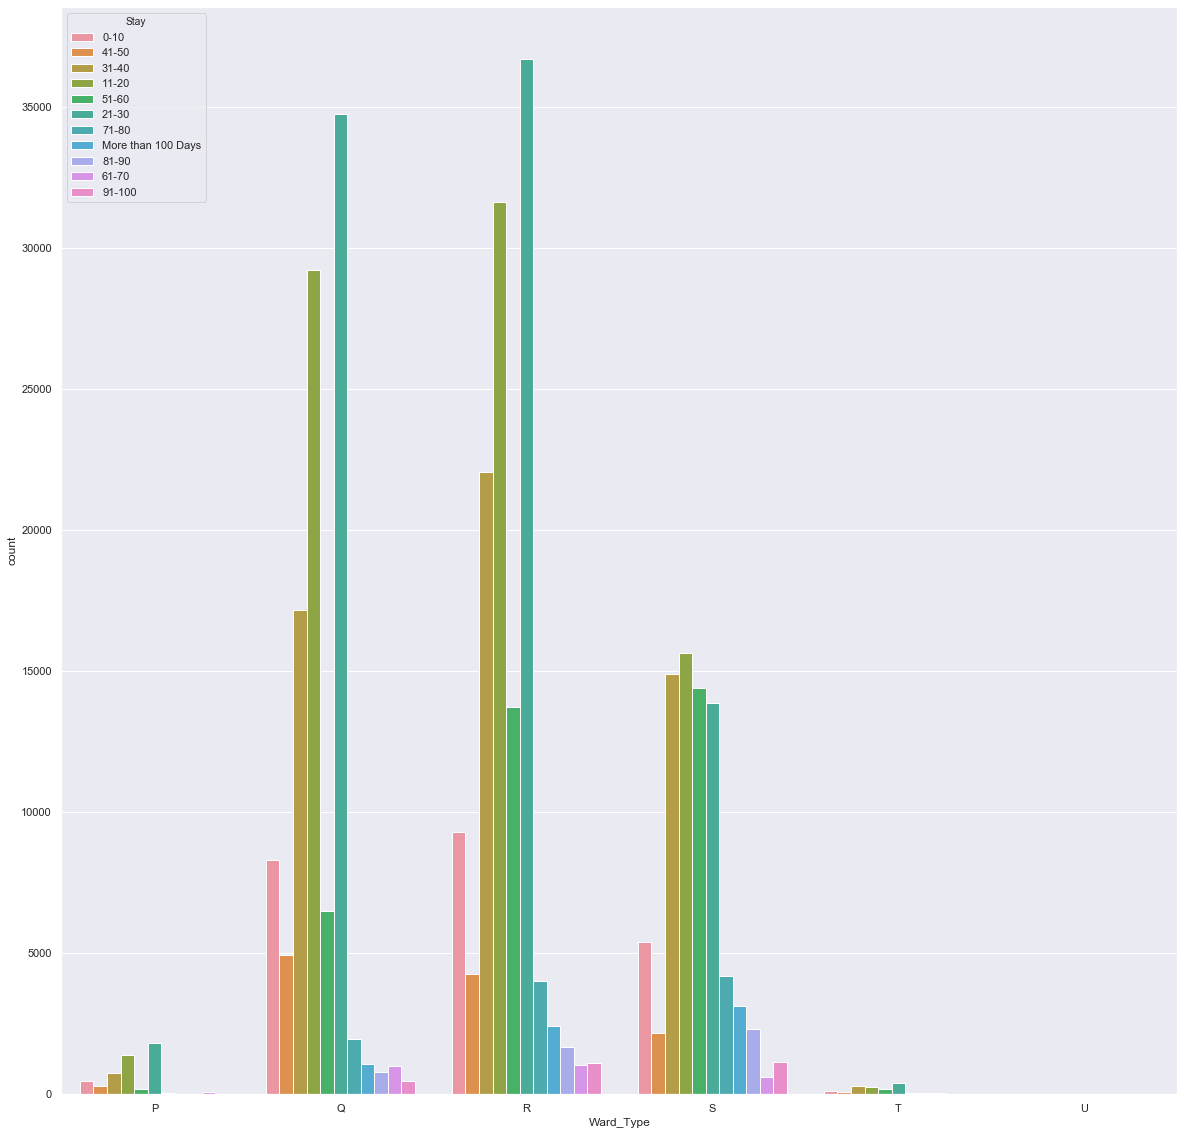

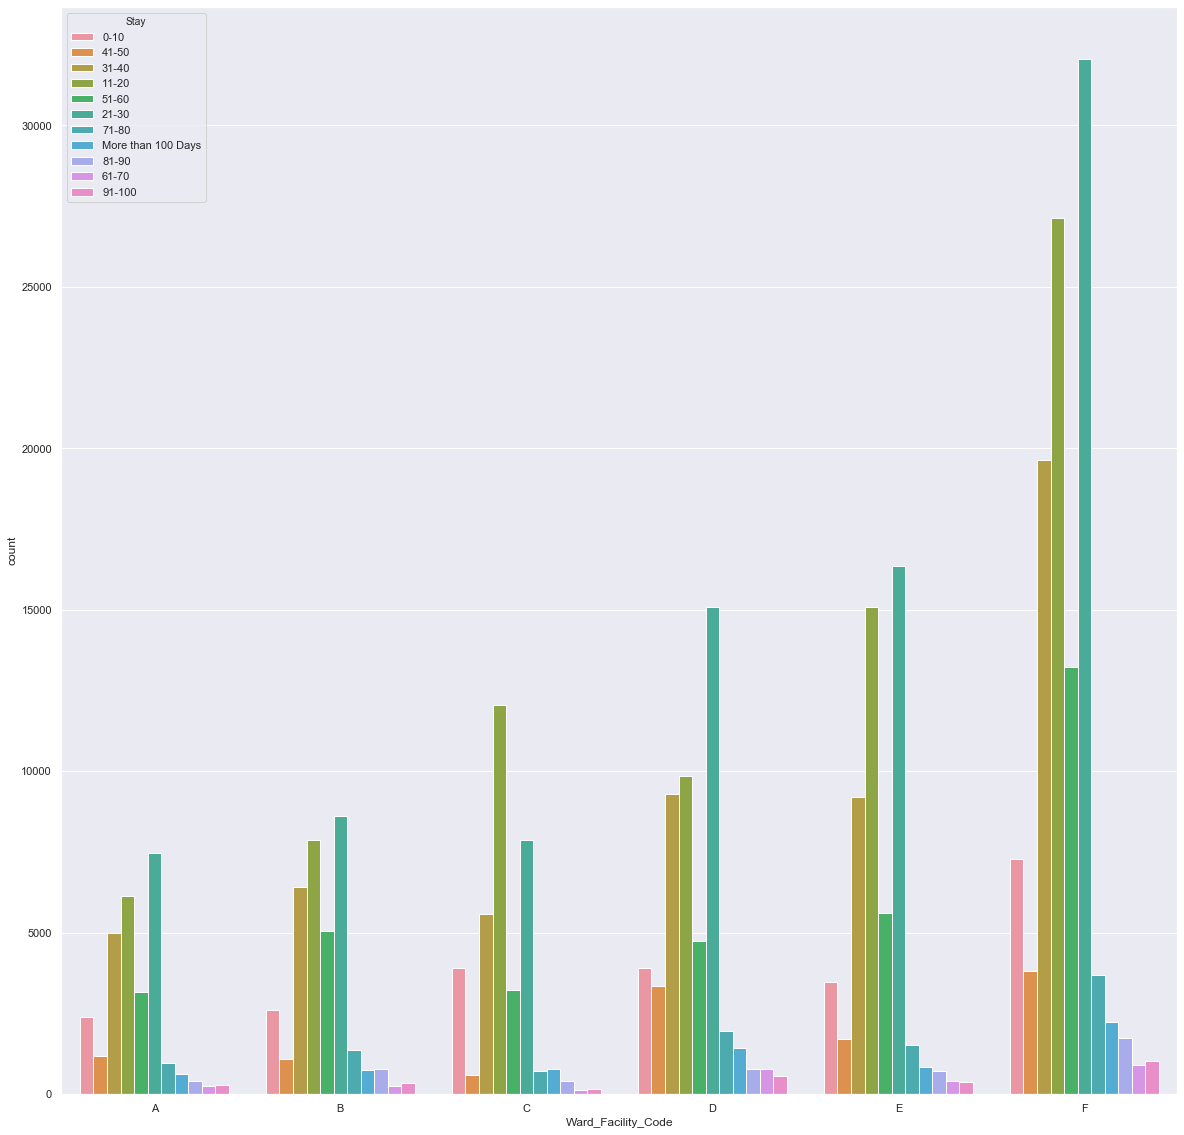

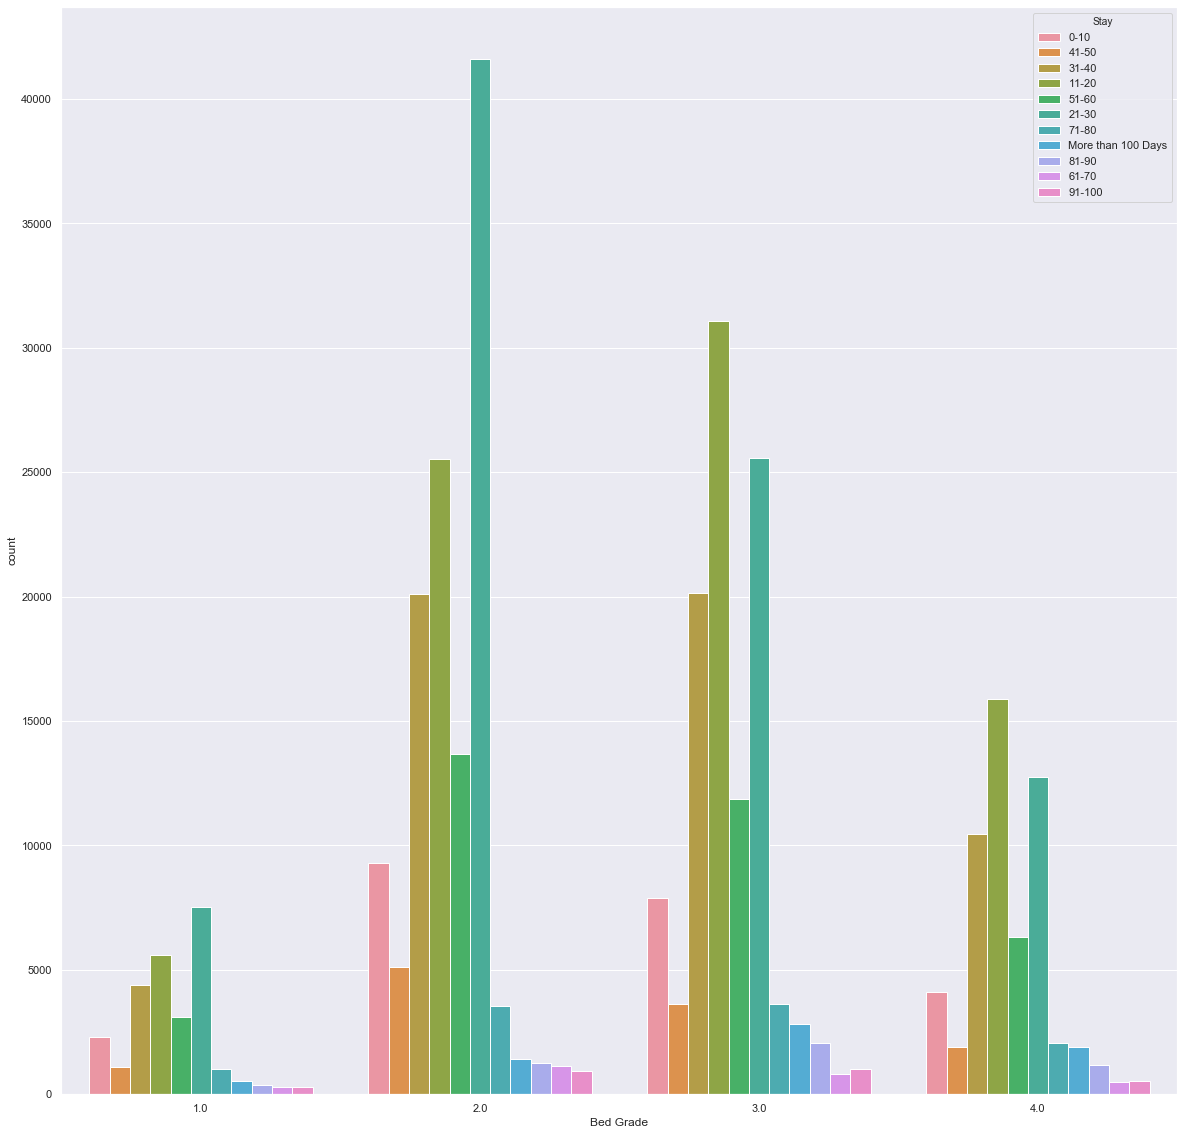

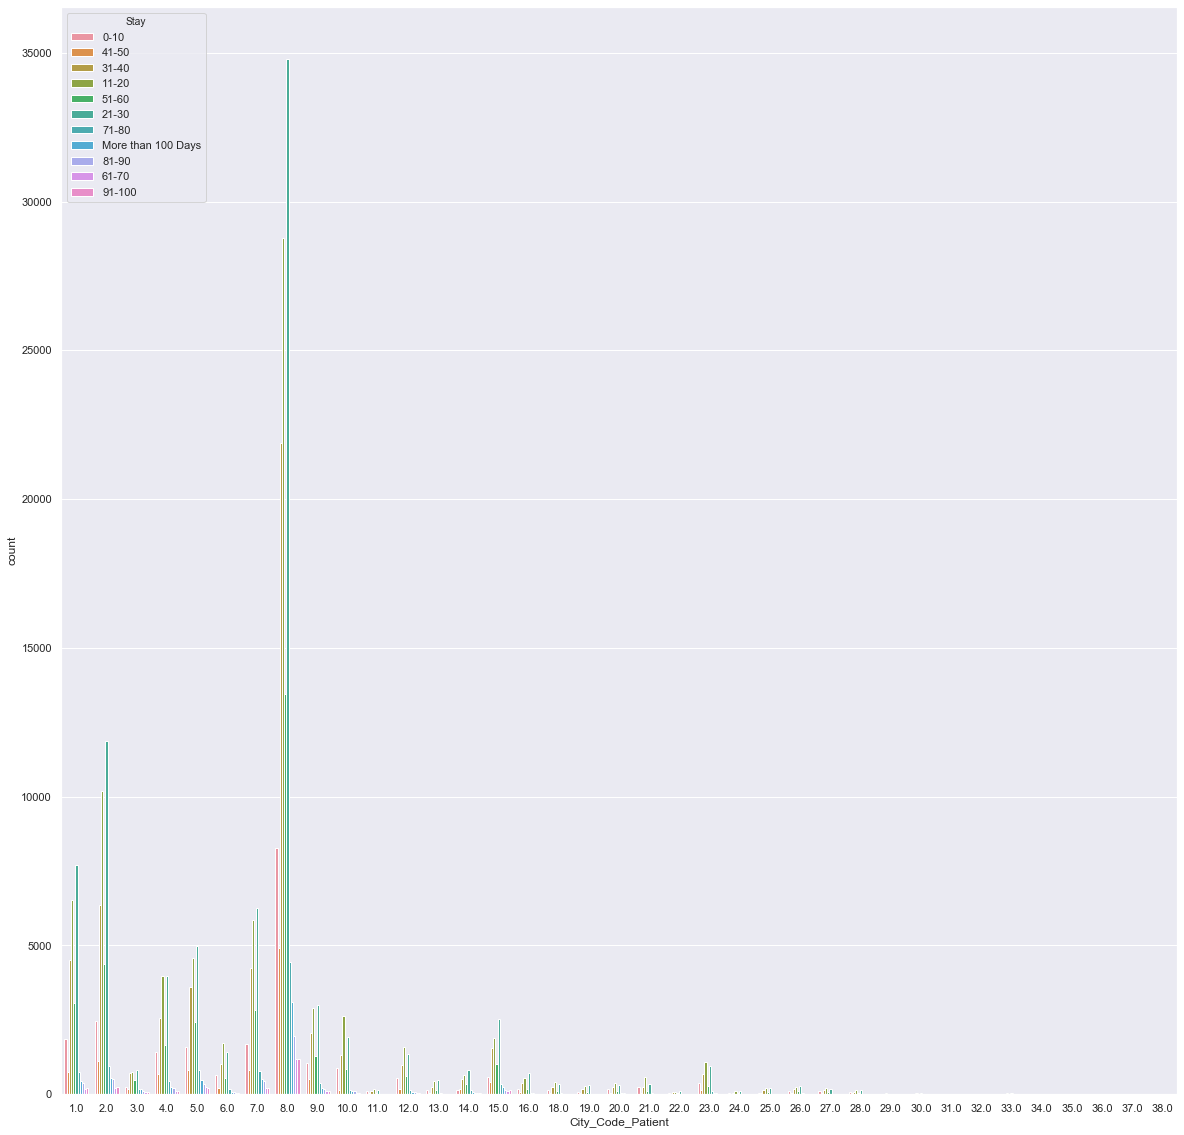

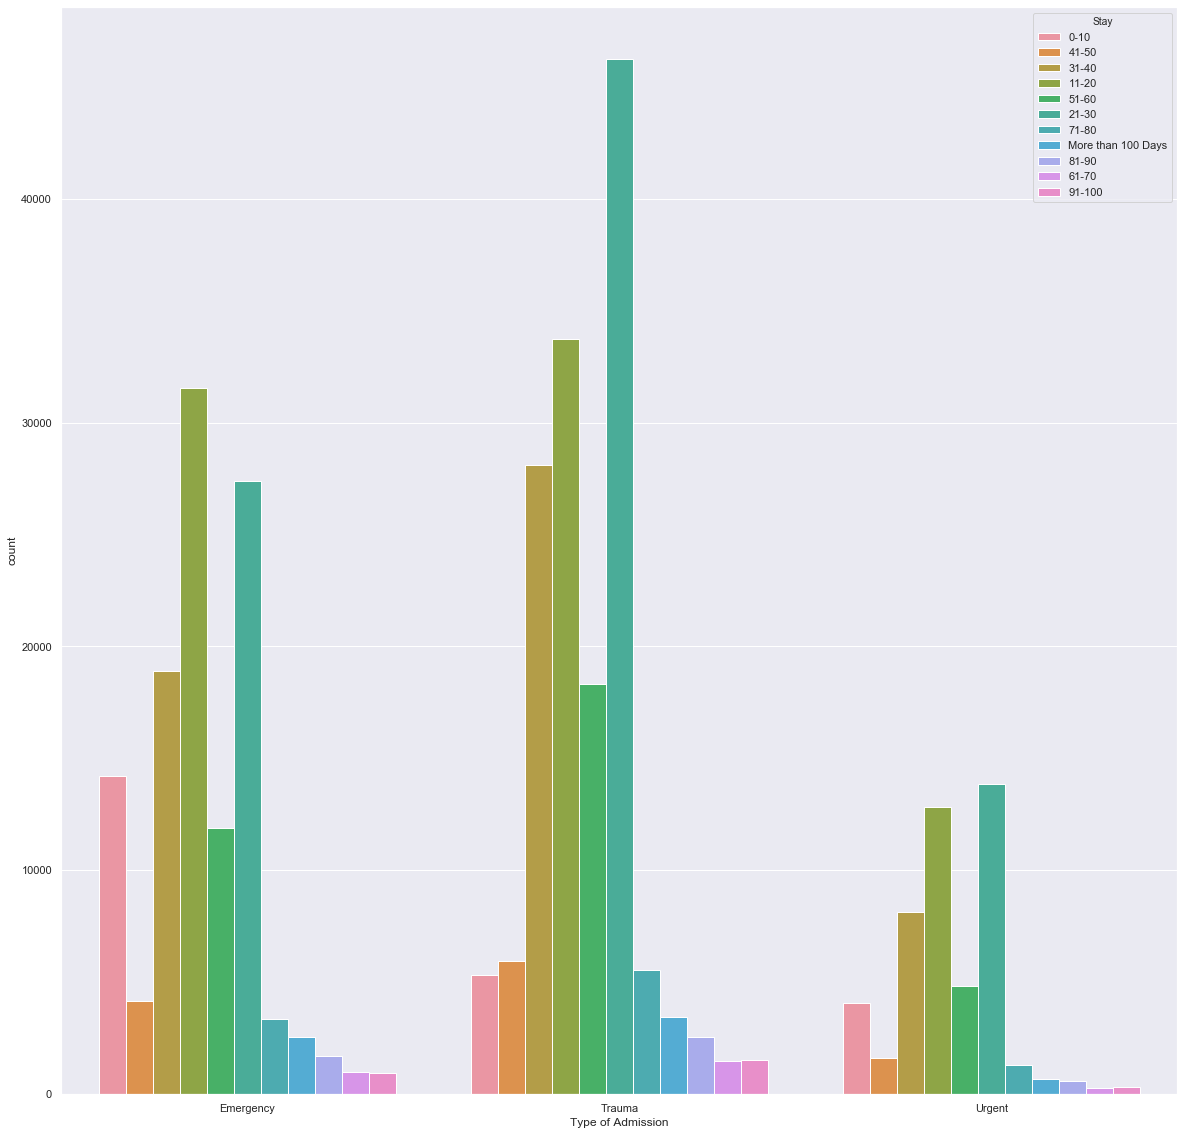

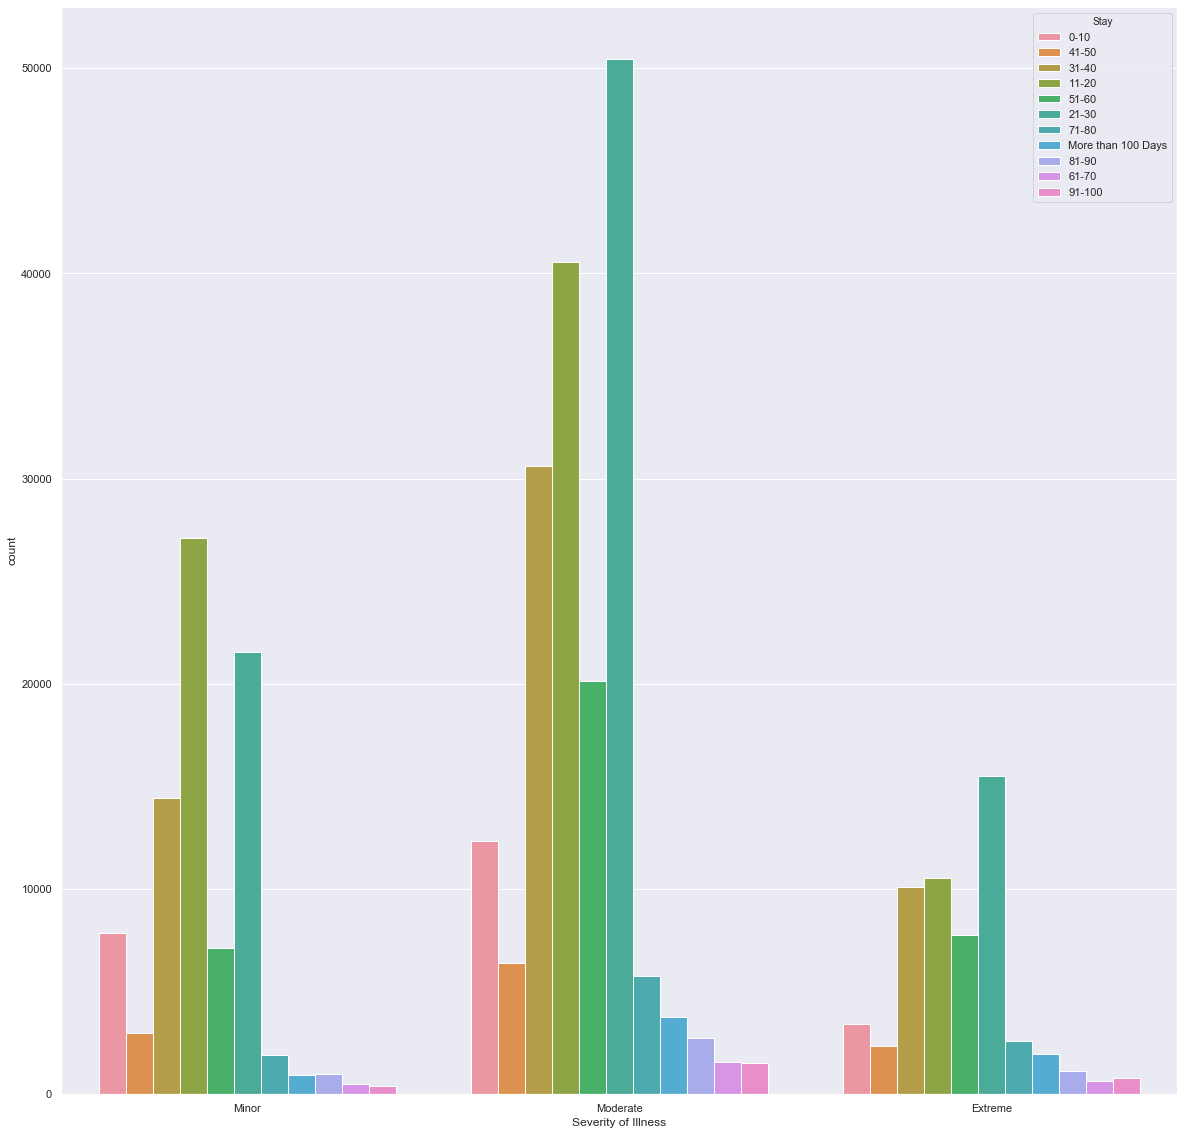

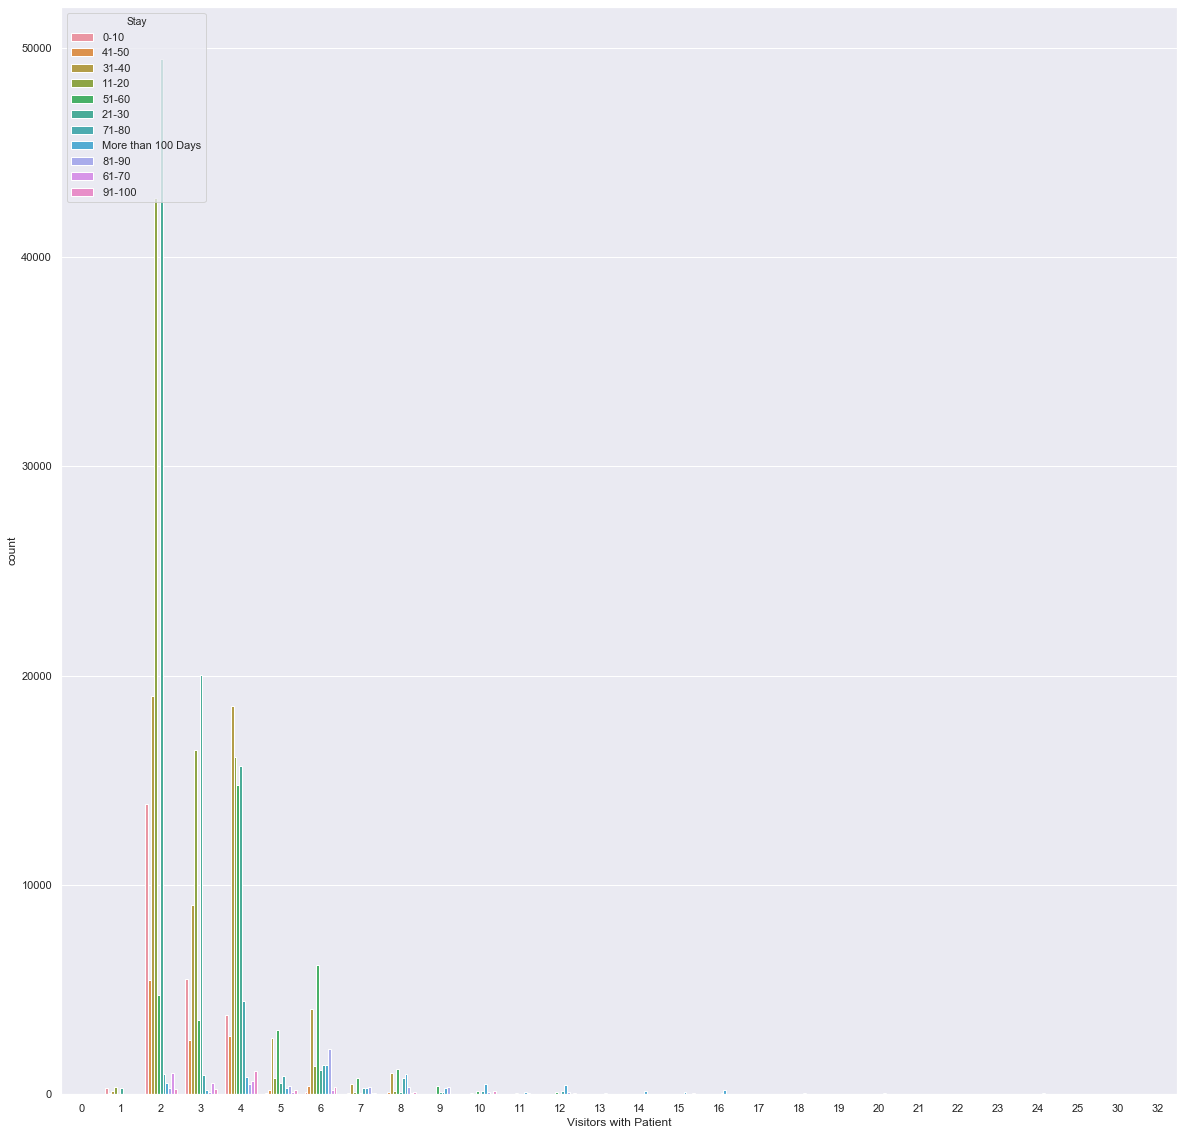

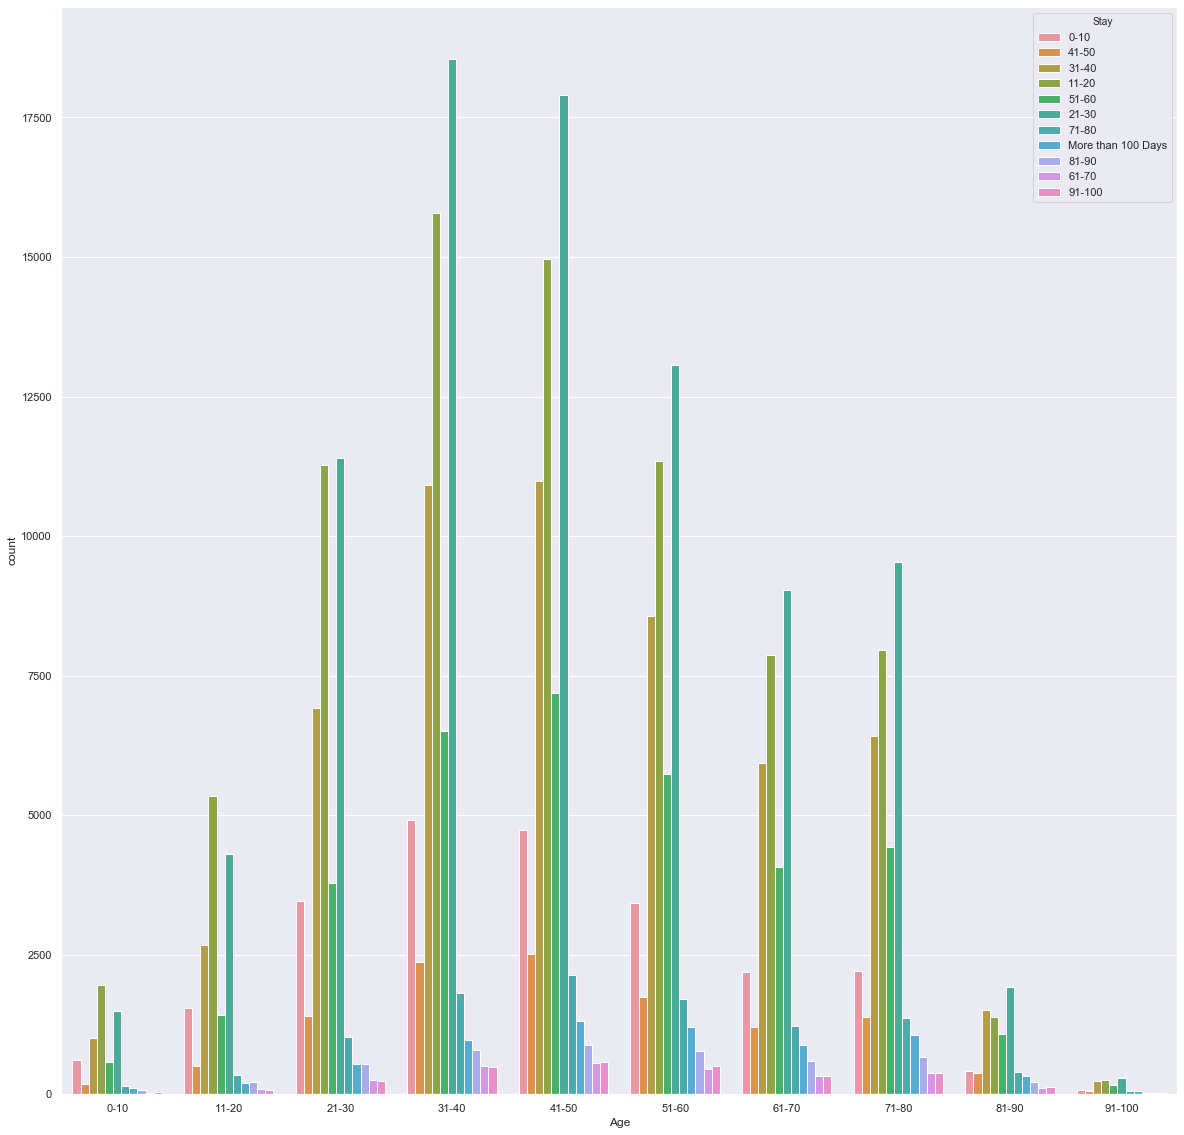

In [37]:
#Checking other columns distribution based on target column
fig, axs = plt.subplots(nrows = 7 , ncols=2)
sns.set(rc={'figure.figsize':(20,20)})
for col in cat_cols:
    if col!='Stay':
        sns.countplot(x = col, hue='Stay',data = modData)
        plt.show()

In [38]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AB6CBF1F88>,
      dtype=object)

In [39]:
num_cols = modData.select_dtypes(exclude=['object','category']).columns.tolist()
num_cols

['Admission_Deposit']

In [40]:
cat_cols

['Hospital_code',
 'Hospital_type_code',
 'City_Code_Hospital',
 'Hospital_region_code',
 'Available Extra Rooms in Hospital',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Bed Grade',
 'City_Code_Patient',
 'Type of Admission',
 'Severity of Illness',
 'Visitors with Patient',
 'Age']

In [41]:
cat_ord_cols

['Bed Grade',
 'Available Extra Rooms in Hospital',
 'Visitors with Patient',
 'Severity of Illness']

In [42]:
le = LabelEncoder()
for col in cat_ord_cols:
    modData[col]= le.fit_transform(modData[col])

In [43]:
modData.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,1,7.0,Emergency,0,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,1,7.0,Trauma,0,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,1,7.0,Trauma,0,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,1,7.0,Trauma,0,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,1,7.0,Trauma,0,2,51-60,5558.0,41-50


In [44]:
# Preprocessing for categorical data
numerical_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num_trf', numerical_transformer, num_cols),
        ('cat_trf', categorical_transformer, nom_cat_cols)        
])

In [45]:
X = modData.drop('Stay', axis=1)
y= modData['Stay']
y=le.fit_transform(y)

In [46]:
y=modData['Stay']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [48]:
X_train.shape

(254750, 15)

In [49]:
X_train

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
231676,19,a,7,Y,4,gynecology,Q,C,1,8.0,Emergency,2,4,41-50,6247.0
166821,19,a,7,Y,2,radiotherapy,S,C,0,2.0,Emergency,2,6,61-70,8000.0
70566,26,b,2,Y,2,radiotherapy,R,D,2,7.0,Emergency,0,3,21-30,4987.0
197982,26,b,2,Y,2,gynecology,Q,D,2,14.0,Trauma,2,3,61-70,7210.0
280389,18,d,13,Y,4,radiotherapy,R,B,1,8.0,Urgent,2,2,41-50,3178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,11,b,2,Y,2,gynecology,Q,D,3,8.0,Trauma,2,2,11-20,4727.0
259178,15,c,5,Z,4,gynecology,P,F,1,6.0,Urgent,0,5,31-40,6568.0
131932,23,a,6,X,2,gynecology,R,F,3,2.0,Urgent,2,2,31-40,6234.0
146867,15,c,5,Z,4,gynecology,Q,F,2,5.0,Urgent,2,4,41-50,3973.0


In [50]:
X_test.shape

(63688, 15)

In [ ]:
# pre_processing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
# train_prep = pre_processing_pipeline.fit_transform(X_train)
# valid_prep = pre_processing_pipeline.transform(X_test)

In [ ]:
# train_prep = pd.DataFrame(train_prep)
# train_prep

In [ ]:
# valid_prep

In [ ]:
# train_prep.isnull().sum()

In [51]:

clf_log_reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', LogisticRegression(penalty='l2', n_jobs=-1, random_state=42))])
clf_log_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_trf',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer())]),
                                                  ['Admission_Deposit']),
                                                 ('cat_trf',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Hospital_code',
                                                   'Hospital_type_code',
                                                   'City_Code_Hospital',
              

In [53]:
def fn_compute_metrics(model, x_train, x_test, y_train, y_test, iter_no, model_name):
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(model.score(x_train, y_train))
    print(model.score(x_test, y_test))
    print("\n")
    

In [54]:
fn_compute_metrics(clf_log_reg, X_train, X_test, y_train, y_test,1,'Log Reg')

0.2743395485770363
0.27639429719884434


